### Multiple Linear Regression Analysis To Predict The Price Of Toyota Corolla

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df= pd.read_csv("ToyotaCorolla - MLR.csv")    # loading dataset
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


### 1. EDA, Visualization, Summary Statistics and Data pre-processing

In [5]:
df.shape  # data cleaning

(1436, 11)

In [6]:
df.isna().sum()   # missing values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
df.duplicated().sum()  # duplicate values

1

In [8]:
df.drop_duplicates(inplace=True)  # duplicates removal
df.duplicated().sum()

0

In [9]:
print(tabulate(df.describe(),headers='keys',tablefmt='double_grid'))    # Statistical Summary

╔═══════╦══════════╦═════════════╦══════════╦═══════════╦══════════════╦═══════════╦═════════════╦═════════════╦═════════════╦═══════════╗
║       ║    Price ║   Age_08_04 ║       KM ║        HP ║    Automatic ║        cc ║       Doors ║   Cylinders ║       Gears ║    Weight ║
╠═══════╬══════════╬═════════════╬══════════╬═══════════╬══════════════╬═══════════╬═════════════╬═════════════╬═════════════╬═══════════╣
║ count ║  1435    ║   1435      ║   1435   ║ 1435      ║ 1435         ║  1435     ║ 1435        ║        1435 ║ 1435        ║ 1435      ║
╠═══════╬══════════╬═════════════╬══════════╬═══════════╬══════════════╬═══════════╬═════════════╬═════════════╬═════════════╬═══════════╣
║ mean  ║ 10720.9  ║     55.9805 ║  68571.8 ║  101.492  ║    0.0557491 ║  1576.56  ║    4.03275  ║           4 ║    5.02648  ║ 1072.29   ║
╠═══════╬══════════╬═════════════╬══════════╬═══════════╬══════════════╬═══════════╬═════════════╬═════════════╬═════════════╬═══════════╣
║ std   ║  3608.73 ║     18

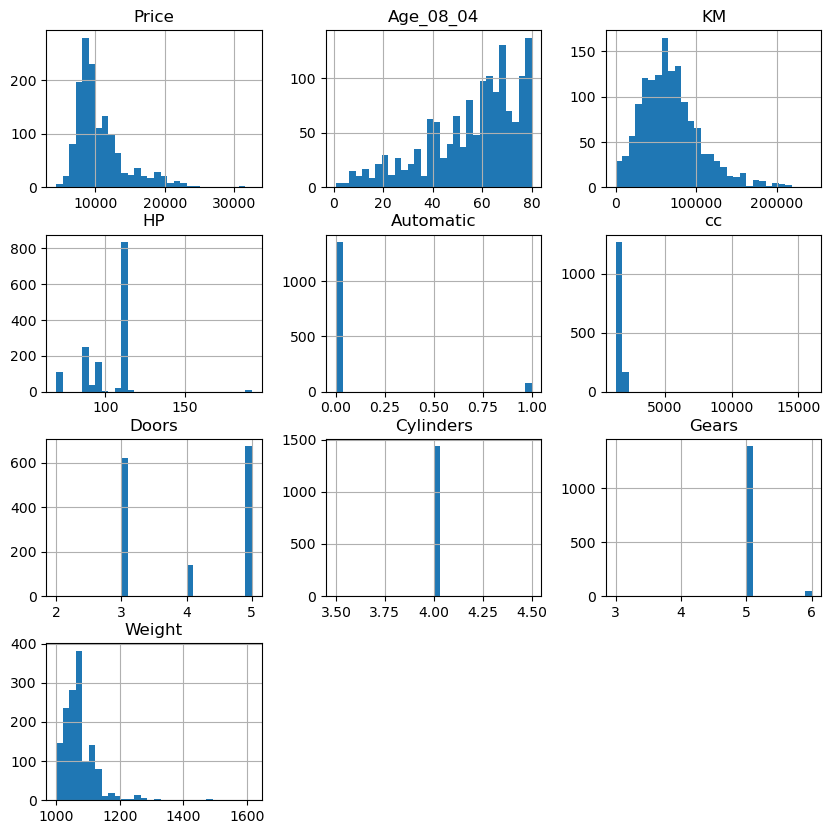

In [10]:
df.hist(bins=30,figsize=(10,10))  # histogram 
plt.show()

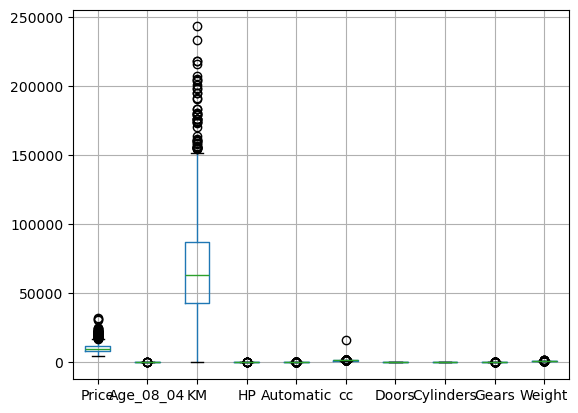

In [11]:
df.boxplot()   # outlier detection
plt.show()

In [12]:
def outlier_capping(df,column):   # oulier identify and removal using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

In [13]:
for i in df.select_dtypes(include=['float','int']).columns:
    outlier_capping(df,i)

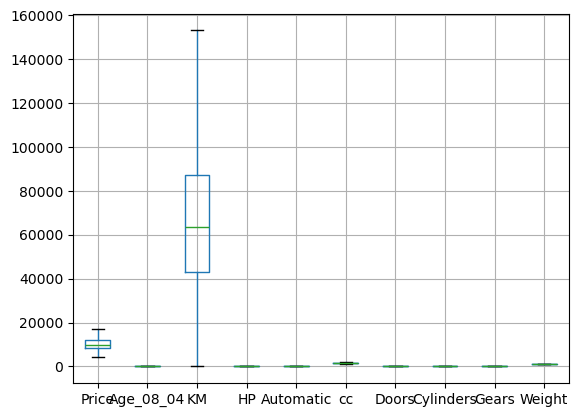

In [14]:
df.boxplot() # no outliers
plt.show()

In [15]:
df.dtypes

Price        float64
Age_08_04    float64
KM           float64
Fuel_Type     object
HP           float64
Automatic    float64
cc           float64
Doors          int64
Cylinders      int64
Gears        float64
Weight       float64
dtype: object

In [16]:
# converting categorical values into numerical
le= LabelEncoder()
df['Fuel_Type']= le.fit_transform(df['Fuel_Type'])
scaler= StandardScaler()
df[['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']]=scaler.fit_transform(df[['Age_08_04','KM','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']])

In [17]:
df.dtypes

Price        float64
Age_08_04    float64
KM           float64
Fuel_Type      int32
HP           float64
Automatic    float64
cc           float64
Doors        float64
Cylinders    float64
Gears        float64
Weight       float64
dtype: object

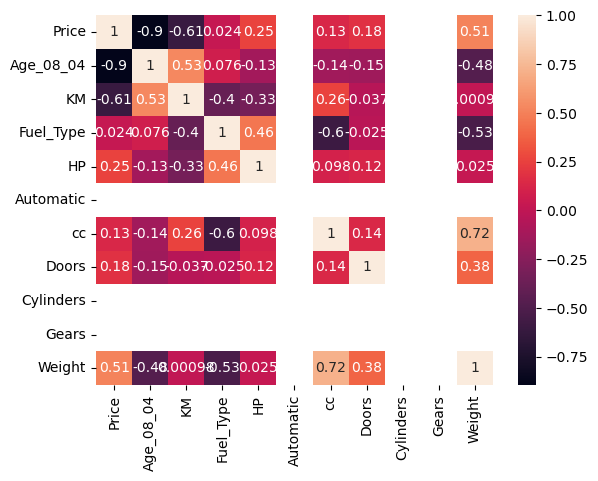

In [18]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

### 2. Splitting the data into training and testing sets

In [20]:
target= df['Price']  # Predict the Price of Toyota corolla
target.head()

0    13500.0
1    13750.0
2    13950.0
3    14950.0
4    13750.0
Name: Price, dtype: float64

In [21]:
features= df.drop(columns='Price')
features.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.781129,-0.595118,1,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997
1,-1.781129,0.152463,1,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997
2,-1.727143,-0.747078,1,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997
3,-1.619171,-0.565908,1,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997
4,-1.403226,-0.839578,1,-0.844145,0.0,2.024972,-1.084443,0.0,0.0,2.226997


In [22]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.80,random_state=100)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 10)
(287, 10)
(1148,)
(287,)


### 3.Building 3 different Models

In [25]:
model1= LinearRegression()

In [26]:
model1.fit(x_train,y_train)

LinearRegression()

In [27]:
model2= LinearRegression()
model2.fit(x_train.drop(['Fuel_Type','Automatic'],axis=1),y_train)

LinearRegression()

In [28]:
model3= LinearRegression()
model3.fit(x_train.drop(['KM','HP'],axis=1),y_train)

LinearRegression()

In [29]:
print('Model_1_coefficient: \n',model1.coef_)     # Interpreting coefficients of the models
print('Model_2_coefficient: \n',model2.coef_)
print('Model_3_coefficient: \n',model3.coef_)

Model_1_coefficient: 
 [-1.95957116e+03 -5.21344620e+02  5.05194471e+02  2.62432287e+02
  5.68434189e-13 -3.30406213e+02 -9.02869211e+01  0.00000000e+00
  0.00000000e+00  9.70016277e+02]
Model_2_coefficient: 
 [-1950.3660122   -548.80147064   348.00220296  -414.59730163
   -77.76422954     0.             0.           928.67398077]
Model_3_coefficient: 
 [-2.29380712e+03  1.55358902e+03 -7.95807864e-13 -2.47620449e+02
 -8.11715330e+01  0.00000000e+00  0.00000000e+00  9.57192843e+02]


### 4. Evaluating Performance of the Models

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
y_pred1= model1.predict(x_test)
y_pred2= model2.predict(x_test.drop(['Fuel_Type','Automatic'],axis=1))
y_pred3= model3.predict(x_test.drop(['KM','HP'],axis=1))

In [33]:
print('\nModel1 MSE:', mean_squared_error(y_test,y_pred1))
print('Model1 r_squared:', r2_score(y_test,y_pred1))

print('\nModel2 MSE:', mean_squared_error(y_test,y_pred2))
print('Model2 r_squared:', r2_score(y_test,y_pred2))

print('\nModel3 MSE:', mean_squared_error(y_test,y_pred3))
print('Model3 r_squared:', r2_score(y_test,y_pred3))


Model1 MSE: 1269017.8863630777
Model1 r_squared: 0.8502399214923704

Model2 MSE: 1293397.7757883235
Model2 r_squared: 0.8473627877706416

Model3 MSE: 1412861.7599658524
Model3 r_squared: 0.8332645344351152


### 5. Apply Lasso and Ridge methods

In [35]:
from sklearn.linear_model import Lasso, Ridge

In [36]:
lasso_model= Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [37]:
print('Lasso coefficients: \n',  lasso_model.coef_)   

Lasso coefficients: 
 [-1959.62848005  -521.45780619   503.66454615   262.50679885
     0.          -330.16069748   -89.98334205     0.
     0.           969.30012856]


In [38]:
ridge_model= Ridge(alpha=0.1)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [39]:
print('Ridge coefficients: \n', ridge_model.coef_)

Ridge coefficients: 
 [-1959.35798293  -521.52375667   504.31471471   262.51502209
     0.          -330.35071988   -90.19118139     0.
     0.           969.78952486]
